In [3]:
from preamble import *
%matplotlib inline

## Introduction
### Why Machine Learning?
#### Problems Machine Learning Can Solve

#### Knowing Your Task and Knowing Your Data

### Why Python?

### scikit-learn
#### Installing scikit-learn

### Essential Libraries and Tools

#### Jupyter Notebook

#### NumPy

In [4]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


#### SciPy

In [5]:
from scipy import sparse
import numpy as np

# 创建⼀个⼆维NumPy数组，对⾓线为1，其余都为0
eye = np.eye(4)
print("NumPy array:\n", eye)

NumPy array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [6]:
# 将NumPy数组转换为CSR格式的SciPy稀疏矩阵
# 只保存⾮零元素
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n", sparse_matrix)


SciPy sparse CSR matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [7]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n", eye_coo)

COO representation:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


#### matplotlib

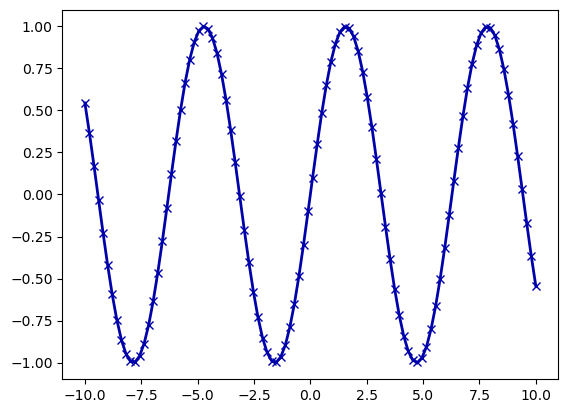

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# Create a second array using sine
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

#### pandas

In [9]:
import pandas as pd

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [10]:
# 选择年龄⼤于30的所有⾏
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


#### mglearn

### Python 2 versus Python 3

### Versions Used in this Book

In [11]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:47:18) [MSC v.1916 64 bit (AMD64)]
pandas version: 2.0.3
matplotlib version: 3.7.2
NumPy version: 1.24.3
SciPy version: 1.11.1
IPython version: 8.15.0
scikit-learn version: 1.3.0


### A First Application: Classifying Iris Species
![sepal_petal](images/iris_petal_sepal.png)
#### Meet the Data

In [12]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [13]:
print("Keys of iris_dataset:\n", iris_dataset.keys())
# load_iris 返回的 iris 对象是⼀个 Bunch 对象，与字典⾮常相似，⾥⾯包含键和值

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [14]:
print(iris_dataset['DESCR'] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [15]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [16]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [18]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [19]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [20]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [21]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [22]:
print("Target:\n", iris_dataset['target'])
# iris['target_names'] 数组给出：0 代表 setosa，1 代表 versicolor，2 代表virginica。

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Measuring Success: Training and Testing Data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [24]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [25]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


#### First Things First: Look at Your Data

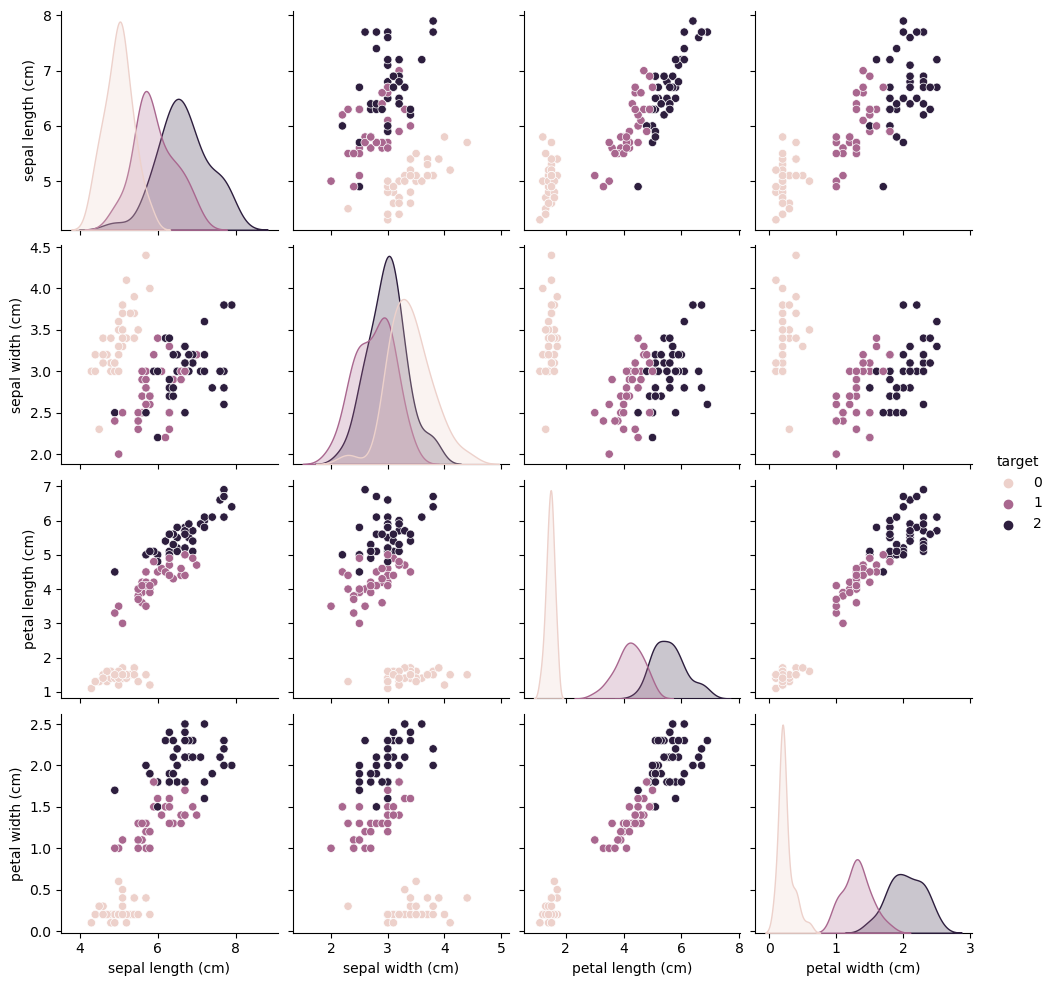

In [26]:
# 利⽤X_train中的数据创建DataFrame
# 利⽤iris_dataset.feature_names中的字符串对数据列进⾏标记
# import mglearn已弃用
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# 利⽤DataFrame创建散点图矩阵，按y_train着⾊
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')
iris_dataframe['target'] = y_train
sns.pairplot(iris_dataframe, hue='target' )
# pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
#                            marker='o', hist_kwds={'bins': 20}, s=60,
#                            alpha=.8, cmap=mglearn.cm3)

#### Building Your First Model: k-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Making Predictions

In [29]:
# 我们在野外发现了⼀朵鸢尾花，花萼⻓ 5cm 宽 2.9cm，花瓣⻓ 1cm 宽 0.2cm
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [30]:
# ⽤ knn 对象的 predict ⽅法来进⾏预测
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])
# 这朵新的鸢尾花属于类别 0，也就是说它属于 setosa 品种

Prediction: [0]
Predicted target name: ['setosa']


#### Evaluating the Model

In [31]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [32]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [33]:
# 使⽤ knn 对象的 score ⽅法来直接计算测试集的精度
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


### Summary and Outlook

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


In [35]:
# 以上代码⽚段包含了应⽤ scikit-learn 中任何机器学习算法的核⼼代码。fit 、predict 和 score
# ⽅法是 scikit-learn 监督学习模型中最常⽤的接⼝。学完本章介绍的概念，你可以将这些模型应⽤到
# 许多机器学习任务上。